# Building and Using Sparse Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as pt

import scipy.sparse as sps

## Building a sparse matrix

**COO**rdinate format is typically convenient for building ("assembling") a sparse matrix:

In [2]:
data = [5, 6, 7]
rows = [1, 1, 2]
columns = [2, 4, 6]

A = sps.coo_matrix(
        (data, (rows, columns)),
        shape=(10, 10), dtype=np.float64)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in COOrdinate format>

In [3]:
A.todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 6., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 7., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
A.nnz

3

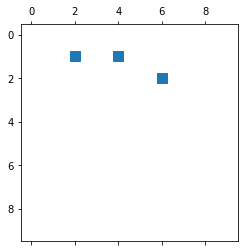

In [5]:
pt.spy(A)

For a COO matrix, the juicy attributes are `data`, `row`, and `col`.

In [6]:
print("row:", A.row)
print("col:", A.col)
print("data:", A.data)

row: [1 1 2]
col: [2 4 6]
data: [5. 6. 7.]


**C**oordinate format is not the only format. 

There is also [**C**ompressed **S**parse **R**ow](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29):

In [9]:
Acsr = A.tocsr()
Acsr

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

For Compressed Sparse Row, look in `data`, `indptr`, and `indices`.

In [8]:
print("indptr:", Acsr.indptr)
print("indices:", Acsr.indices)
print("data:", Acsr.data)

indptr: [0 0 2 3 3 3 3 3 3 3 3]
indices: [2 4 6]
data: [5. 6. 7.]


## Performance of the Matrix-Vector Product

The following code randomly generates a sparse matrix that has a given `fill_percent` percentage of nonzero entries:

In [18]:
fill_percent = 5

size = 1000
nentries = size**2 * fill_percent // 100

data = np.random.randn(nentries)
rows = (np.random.rand(nentries)*size).astype(np.int32)
columns = (np.random.rand(nentries)*size).astype(np.int32)

B_coo = sps.coo_matrix(
        (data, (rows, columns)),
        shape=(size, size), dtype=np.float64)

B_csr = sps.csr_matrix(B_coo)

B_dense = B_coo.todense()

Next, we time matrix-vector multiplication for different versions of `B`:

In [26]:
vec = np.random.randn(size)

from time import time
start = time()

for i in range(2000):
    B_dense.dot(vec)
    
print("time: %g" % (time() - start))

time: 1.96073
